In [1]:
import sys; sys.version

'3.6.0 |Anaconda custom (x86_64)| (default, Dec 23 2016, 13:19:00) \n[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]'

http://www.nltk.org/book/ch02.html

In [2]:
import nltk

In [5]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

192427

In [8]:
emma

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [9]:
emma_text = nltk.Text(emma)

In [11]:
emma_text.concordance('surprise')

Displaying 1 of 1 matches:
 that Emma could not but feel some surprise , and a little displeasure , on he


## Gutenburg

In [12]:
from nltk.corpus import gutenberg

In [13]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [14]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars), round(num_words), round(num_sents), round(num_vocab))


887071 192427 7752 7344
466292 98171 3747 5835
673022 141576 4999 6403
4332554 1010654 30103 12767
38153 8354 438 1535
249439 55563 2863 3940
84663 18963 1054 1559
144395 34110 1703 2636
457450 96996 4779 8335
406629 86063 3806 7794
320525 69213 3742 6349
935158 210663 10230 8447
1242990 260819 10059 17231
468220 96825 1851 9021
112310 25833 2163 3032
162881 37360 3106 4716
100351 23140 1907 3464
711215 154883 4250 12452


In [15]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [17]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')

chatroom[123]

['i',
 'do',
 "n't",
 'want',
 'hot',
 'pics',
 'of',
 'a',
 'female',
 ',',
 'I',
 'can',
 'look',
 'in',
 'a',
 'mirror',
 '.']

## Brown

In [19]:
from nltk.corpus import brown

brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [24]:
news_text = brown.words(categories='news')
news_text

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [21]:
brown.words(fileids=['cg22'])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [22]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [27]:
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']

for m in modals:
    print(m + ':', fdist[m], end=' ') # will wins

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

In [34]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))


In [35]:
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


## Reuters

In [36]:
from nltk.corpus import reuters

In [40]:
reuters.fileids()[:5]

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833']

In [41]:
reuters.categories()[:5]

['acq', 'alum', 'barley', 'bop', 'carcass']

##  Inaugural Address Corpus

In [42]:
from nltk.corpus import inaugural
inaugural.fileids()
[fileid[:4] for fileid in inaugural.fileids()]

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009']

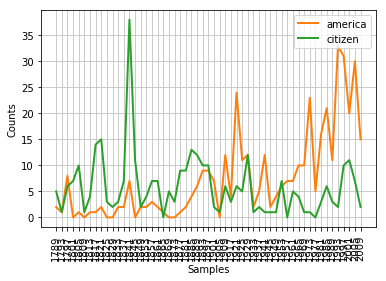

In [48]:
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:4])
           for fileid in inaugural.fileids()
           for w in inaugural.words(fileid)
           for target in ['america', 'citizen']
           if w.lower().startswith(target))
cfd.plot()

In [49]:
help(nltk.corpus.reader)

Help on package nltk.corpus.reader in nltk.corpus:

NAME
    nltk.corpus.reader

DESCRIPTION
    NLTK corpus readers.  The modules in this package provide functions
    that can be used to read corpus fileids in a variety of formats.  These
    functions can be used to read both the corpus fileids that are
    distributed in the NLTK corpus package, and corpus fileids that are part
    of external corpora.
    
    Corpus Reader Functions
    Each corpus module defines one or more "corpus reader functions",
    which can be used to read documents from that corpus.  These functions
    take an argument, ``item``, which is used to indicate which document
    should be read from the corpus:
    
    - If ``item`` is one of the unique identifiers listed in the corpus
      module's ``items`` variable, then the corresponding document will
      be loaded from the NLTK corpus package.
    - If ``item`` is a fileid, then that file will be read.
    
    Additionally, corpus reader functions c

## WordNet

In [50]:
from nltk.corpus import wordnet as wn
wn.synsets('boss')

[Synset('foreman.n.01'),
 Synset('boss.n.02'),
 Synset('boss.n.03'),
 Synset('party_boss.n.01'),
 Synset('knob.n.01'),
 Synset('bos.n.01'),
 Synset('emboss.v.01'),
 Synset('boss.s.01')]

In [53]:
boss_n_01 = wn.synset('boss.n.01')
boss_n_01.lemma_names()

['foreman', 'chief', 'gaffer', 'honcho', 'boss']

In [54]:
boss_n_01.definition()

'a person who exercises control over workers'

In [55]:
boss_n_01.examples()

['if you want to leave early you have to ask the foreman']

In [56]:
boss_n_01.lemmas()

[Lemma('foreman.n.01.foreman'),
 Lemma('foreman.n.01.chief'),
 Lemma('foreman.n.01.gaffer'),
 Lemma('foreman.n.01.honcho'),
 Lemma('foreman.n.01.boss')]

In [57]:
wn.lemma('foreman.n.01.boss').name()

'boss'

### WordNet Hyponyms

In [58]:
boss_n_01.hyponyms()

[Synset('baas.n.01'), Synset('ganger.n.01'), Synset('straw_boss.n.01')]

In [59]:
boss_n_01.hypernyms()

[Synset('supervisor.n.01')]

In [60]:
boss_n_01.hypernyms()[0].hypernyms()

[Synset('superior.n.01')]

In [62]:
boss_n_01.hypernyms()[0].hypernyms()[0].hyponyms()

[Synset('better.n.03'), Synset('god.n.03'), Synset('supervisor.n.01')]

In [63]:
boss_n_01.hypernyms()[0].hypernyms()[0].hypernyms()

[Synset('leader.n.01')]

In [64]:
boss_n_01.hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()

[Synset('person.n.01')]

In [65]:
boss_n_01.hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()

[Synset('causal_agent.n.01'), Synset('organism.n.01')]

In [66]:
boss_n_01.hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()

[Synset('physical_entity.n.01')]

In [72]:
person = wn.synset('person.n.01')
types_of_people = person.hyponyms()
types_of_people[:5]

[Synset('abator.n.01'),
 Synset('abjurer.n.01'),
 Synset('abomination.n.01'),
 Synset('abstainer.n.02'),
 Synset('achiever.n.01')]

In [75]:
cat = wn.synsets('cat')[0]

cat.path_similarity(wn.synsets('wolf')[0])

0.2

In [79]:
cat.path_similarity(wn.synsets('lion')[0])

0.25

In [77]:
cat.lowest_common_hypernyms(wn.synsets('wolf')[0])

[Synset('carnivore.n.01')]

In [81]:
cat.lowest_common_hypernyms(wn.synsets('lion')[0])

[Synset('feline.n.01')]